## Warm-up exercise (10 minutes)
- Before exploring backwards propagation let's review forward propagation
- We'll build a 1 layer hidden network and calculate the forward propagated values for a set of fixed weights and inputs
- To ensure that there is a solid understanding of the ideas our output will be multi-class classification
- Our goal will be to setup:
    - 3 input
    - 1 hidden layer with 3 hidden units
    - 4 outputs
    - `sigmoid` activation (for a challenge try the `relu` activation)

## Steps:
0. Draw the network
1.  Using either `lambda` or `def` define the:
    a. Sigmoid activation function 
    b. Softmax output function
2. Set the random number seed to 1234
    - Use `np.random.random(.)` to initialize the weights for `W,b,V,c`, round to the second decimal
    - Set $ X = \begin{bmatrix}1&0&0\\0&1&1\end{bmatrix}$
    - With the values calculated in 2.a and the inputs in 2.b. analytically calculate the probability of belonging to class 1,2 and 3 for a forward pass in the network
3. Set up the network in python 
    - Calculate the output probabilities to the nearest 0.01 value
    - Confirm your results

In [69]:
# ---- Import Libraries ----
import numpy as np
%matplotlib inline

# --- Setting up ReLu activation ---
relu = np.vectorize(lambda z: np.fmax(0,z))
softmax = lambda z: z/np.sum(z, axis = 1, keepdims=True)

# --- Setting up network ---
def simple_nn_1(x, W,b, V,c):
    a1 = x.dot(W) + b
    h1 = relu(a1)
    a2 = h1.dot(V) + c
    out = np.round(softmax(a2),2)
    return(out)

In [71]:
# --- Import random ---
from numpy import random

# Setting up values 
X = np.array([[1,0,0],[0,1,1]])

# - Instantiatve matrices -
random.seed(123)
W = np.round(random.random((3,3)),1)
b = np.round(random.random(3),1)
V = np.round(random.random((3,4)),1)
c = np.round(random.random(4),1)

# --- Print values ---
print("""
X:\n{X}
W:\n{W} 
b:\n{b}
V:\n{V} 
c:\n{c}
""".format(X = X, W = W,b = b,V = V,c = c))


X:
[[1 0 0]
 [0 1 1]]
W:
[[0.7 0.3 0.2]
 [0.6 0.7 0.4]
 [1.  0.7 0.5]] 
b:
[0.4 0.3 0.7]
V:
[[0.4 0.1 0.4 0.7]
 [0.2 0.2 0.5 0.5]
 [0.6 0.8 0.7 0.6]] 
c:
[0.7 0.3 0.4 0.2]



In [72]:
# --- Pushing the values through the network ---
simple_nn_1(X, W,b,V,c)

array([[0.27, 0.19, 0.27, 0.27],
       [0.24, 0.18, 0.28, 0.3 ]])

### Exercise: Gradient Descent
1. Write a function in python that finds the minimum and maximum of
$$
f(x) = (x-3)^3 - 3*x^2
$$
Questions:
    1. Is there a global minimum/maximum?
    2. What happens if you instantiate the function at values $>10$
    3. What happens if you instantiate the function at values $<0$
    4. How about for values in between $2-7$
    5. What happens as you change the learning rate from 0.01 to 5, plot the paths the curves take
2. Suppose we modified our function such that we now had:
$$
f(x,y) =x^2/81 + y^2/100
$$
- At what point does it's maximum occur?

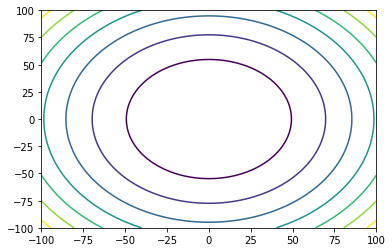

In [139]:
import matplotlib.pyplot as plt
import numpy as np
# --- Paraboloid Function ---
delta = 0.05
x = np.arange(-100.0, 100.0, delta)
y = np.arange(-100.0, 100.0, delta)
X, Y = np.meshgrid(x, y)
Z = Y**2/100 + X**2/81
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

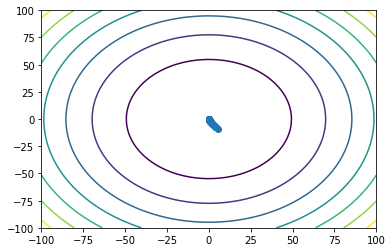

In [140]:
# --- Setting up gradient ---
def grad_f(vector):
    x, y = vector
    df_dx = x*2/81
    df_dy = y/50
    return np.array([df_dx, df_dy])

# --- Grad Descent ----
def grad_descent(starting_point=None, iterations=10, learning_rate=6):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

# --- Visualize Trajectory ---
np.random.seed(10)
traj = grad_descent(iterations=50)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')